In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(1, 1)

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for x, y in data:
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

NameError: name 'data' is not defined

Эпоха 10:loss = 0.2948
Эпоха 20:loss = 0.0823
Эпоха 30:loss = 0.0724
Эпоха 40:loss = 0.0681
Эпоха 50:loss = 0.0641
Эпоха 60:loss = 0.0604
Эпоха 70:loss = 0.0569
Эпоха 80:loss = 0.0536
Эпоха 90:loss = 0.0504
Эпоха 100:loss = 0.0475

Параметры модели
w = 1.8191, b = 0.5317


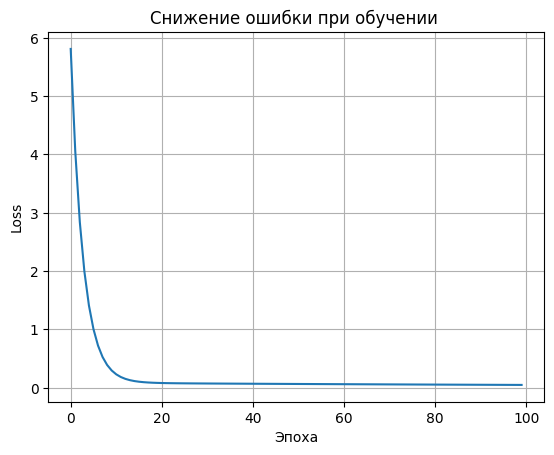

In [9]:
import torch
import torch.nn as nn
# torch.nn - модуль с готовыми слоями и фунциями потерь
import torch.optim as optim
# содержит оптимизаторы, например SGD, Adam
import matplotlib.pyplot as plt


x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

model = nn.Linear(in_features=1, out_features=1)
# in_features=1 - на вход подается одно число (х)
# out_features=1 - на выходе одно число(предсказание у)
loss_fn = nn.MSELoss()
# Loss = 1/n * (sum(y_pred - y_true) ** 2)
optimizer = optim.SGD(model.parameters(), lr=0.01)
# model_parameters() - параметры модели(веса и смещения)
# lr=0.01 - lerning rate(скорость обучения). Чем выше - тем быстрее меняются параметры.
epochs = 100
# Обучаем модель за 100 циклов 
loss_history = []
# Список, где будут значения ошибок, чтобы нарисовать график.

for epoch in range(epochs):
    y_pred = model(x_train)
    # делает предсказание на входах x_train 
    loss = loss_fn(y_pred, y_train)
    # вычисляем ошибку предсказания между y_pred и y_train
    loss_history.append(loss.item())
    # loss.item() - превращаем PyTorch-тензор в обычное число и добавляем в loss_history
    optimizer.zero_grad()
    # Обнуляем старые градиенты перед новым шагом В Pytorch они накапливаются, поэтому надо чистить каждый раз
    loss.backward()
    # считает градиенты автоматически: производная ошибки по весу и производная ошибки по смещению
    optimizer.step()
    # оптимизатор обновляет параметры модели: W = W - learning_rate * градиент
    
    if (epoch+1) % 10 == 0:
        print(f'Эпоха {epoch+1}:loss = {loss.item():.4f}')
    # каждые 10 эпох печатаем текущую ошибку, чтобы видеть прогресс обучения
print('\nПараметры модели')
print(f'w = {model.weight.item():.4f}, b = {model.bias.item():.4f}')
plt.plot(loss_history)
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.title('Снижение ошибки при обучении ')
plt.grid(True)
plt.show()